In [1]:
#This code implements gradient boosting to see the effects on the model performance 

Gradient boosting is more succesful than adaboosting, resulting in the lowest errors seen in a models performance so far, including in the implementation of random forests. This is probably to do with the fact that gradient boosting is more robust to outliers than adaboosting, due to the fact that any differentiable loss function can be used. In adaboosting the exponential loss function is minimised making the algorithm sensitive to outliers. As our dataset is likely to have 'random' foods which could be outliers, it is obvious that gradient boosting would work more effectively. 

Gradient boosting results in slightly better performance than random forests, in terms of the errors from the model. The biggest difference between the two algorithms is that random forests use a large number of trees, using averages to predict at the end of the process. Gradient boosting also uses a large number of trees but starts the combining process at the beginning rather than doing it as the final step. Random forests build each tree independently whilst gradient boosting builds one tree at a time. 

generally these results are probably lending to the fact that our data has outliers but is not particularly noisy, hence why gradient boosting performs better. 

In [1]:
#importing modules for the implementation
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
from sklearn.feature_selection import SelectFromModel

In [2]:
#pulling the data from the pickled dataset 
nutrition = pd.read_csv("./Nutrition_Full_Features.csv")


In [3]:
#dropping NANSinclude a lot of NaNs
#nutrition.drop(nutrition.columns[1:3], axis=1, inplace=True)
nutrition = nutrition.dropna()

In [4]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X = nutrition.iloc[:,11:]

In [5]:
#extracting the greenhouse gas emissions 
y = nutrition.iloc[:,7:8]

In [11]:
#changing y to a 1d array rather than the table 
y = np.ravel(y)

In [12]:
#splitting the dataset into a test and train data set, with 20% being used for testing
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.2) #size =0.2 means 80% data is training data, 20% testing


In [13]:
#splitting train data set into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.01)

In [47]:
#storing the prediction from the test 
from sklearn.ensemble import GradientBoostingRegressor
#importing sklearn algorithm s 
#storing the prediction from the test 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
#from numpy import mean 
#from numpy import std
# evaluate the model
# using a k fold cross vallidation basically completes the validation many times
# resulting in the mean result across all folds so you get a less noisy estimate of the models performance 
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#cross validation could mean we can train on more of the data, wouldnt need to define test and train sets
#n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.308 (0.057)


In [48]:
#evaluating the model by checking errors
#generally error decreases slightly as number of trees is increased, converges around 200 trees

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2181416599227723
Mean Squared Error: 0.2922415573827202
Root Mean Squared Error: 0.540593708234493


In [13]:
np.mean(y)

0.8464732245681383

In [14]:
np.std(y)

1.6110865075846403

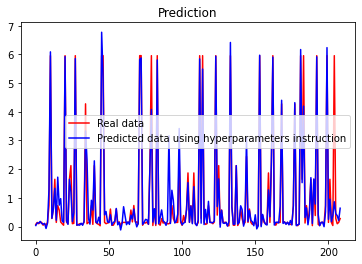

In [39]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data using hyperparameters instruction')
plt.title('Prediction')
plt.legend()
plt.show()

In [49]:
#writing a for loop to pull out the error at varying n_estimators (otherwise known as the number of trees the algorithm is using)


mse = []
mae = []
rmse = []
        
for i in range(100,1000,5):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)
    Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred)
    Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
   
    mse.append(Mean_Squared_Error)
    rmse.append(Root_Mean_Squared_Error)
    mae.append(Mean_Absolute_Error)
    

<function matplotlib.pyplot.show(close=None, block=None)>

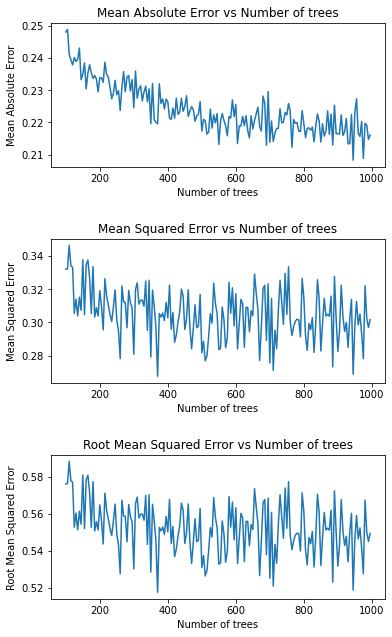

In [50]:
#creating a list of the number of estimators for ploting 
Number_estimators = list(range(100,1000,5))


fig = plt.figure()
Absolute = plt.subplot(311)
Absolute.title.set_text('Mean Absolute Error vs Number of trees')
plt.plot(Number_estimators,mae)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of trees')
plt.show

Square = plt.subplot(312)
Square.title.set_text('Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,mse)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of trees')
plt.show

Root = plt.subplot(313)
Root.title.set_text('Root Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,rmse)
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Number of trees')
plt.subplots_adjust(top= 4, bottom=2, wspace=1, hspace=0.5)
plt.savefig('Error Plots')
plt.show



In [17]:
#automatically select features 
sel = SelectFromModel(model)
sel.fit(X_train, y_train)
#seeing which features are important 
#returns an array of trues when features are more important than mean 
# false when features are less important than mean importance 
sel.get_support()

# make a list and count selected features 

selected_feat = X_train.columns[(sel.get_support())]
#return the number of features selected by the random forest 
len(selected_feat)
#get the name of feautures selected 
print(selected_feat)

Index(['Fiber (g)', 'Saturated Fats (g)', 'Iron, Fe (mg)', 'Magnesium (mg)',
       'Water (g)', 'Omega 6s (mg)', 'Zinc, Zn (mg)',
       'Fatty acids, total polyunsaturated (mg)'],
      dtype='object')
